# Вариант №12

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

PATH_TO_FILE = "Sleep_health_and_lifestyle_dataset.csv"

df = pd.read_csv(PATH_TO_FILE)

Разведочный анализ EDA

In [5]:
y_eda = df['Sleep Duration']

X_eda = df.drop(columns=['Sleep Duration', 'Person ID'])
print(X_eda.describe(include = 'all'))

       Gender         Age Occupation  Quality of Sleep  \
count     374  374.000000        374        374.000000   
unique      2         NaN         11               NaN   
top      Male         NaN      Nurse               NaN   
freq      189         NaN         73               NaN   
mean      NaN   42.184492        NaN          7.312834   
std       NaN    8.673133        NaN          1.196956   
min       NaN   27.000000        NaN          4.000000   
25%       NaN   35.250000        NaN          6.000000   
50%       NaN   43.000000        NaN          7.000000   
75%       NaN   50.000000        NaN          8.000000   
max       NaN   59.000000        NaN          9.000000   

        Physical Activity Level  Stress Level BMI Category Blood Pressure  \
count                374.000000    374.000000          374            374   
unique                      NaN           NaN            4             25   
top                         NaN           NaN       Normal         130/8

Выведем распределение качества сна и разбор по качеству сна и длительности сна

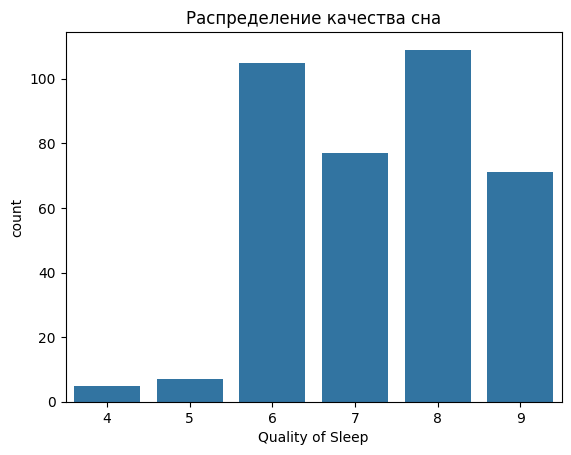

                  count      mean       std  min   25%  50%   75%  max
Quality of Sleep                                                      
4                   5.0  5.860000  0.054772  5.8  5.80  5.9  5.90  5.9
5                   7.0  6.500000  0.081650  6.4  6.45  6.5  6.55  6.6
6                 105.0  6.195238  0.204930  5.9  6.00  6.1  6.30  6.9
7                  77.0  7.140260  0.545860  6.5  6.60  7.1  7.70  7.9
8                 109.0  7.403670  0.271118  7.1  7.20  7.3  7.70  7.9
9                  71.0  8.243662  0.181842  8.0  8.10  8.2  8.40  8.5


In [9]:
sns.countplot(data=df, x="Quality of Sleep")
plt.title("Распределение качества сна")
plt.show()

print(df.groupby("Quality of Sleep")['Sleep Duration'].describe())

Больше всего людей с качеством сна 6, 7, 8. Датасет несбалансирован, преобладают средние и высокие значения.

При низком качестве сна (4-5) длительность сна равна 5-6 часов. При среднем качестве сна (6-7) длительность сна уже выше: 6-7 часов. При высоком качестве сна (8-9) ещё выше: 7-8 часов.

Чем выше качество сна, тем больше его длительность. Распределение сильно «сосредоточено» на значениях 6,7,8 , так что модель будет предсказывать их чаще.

Выведем boxplot с распредлением Sleep Duration по Quality of Sleep

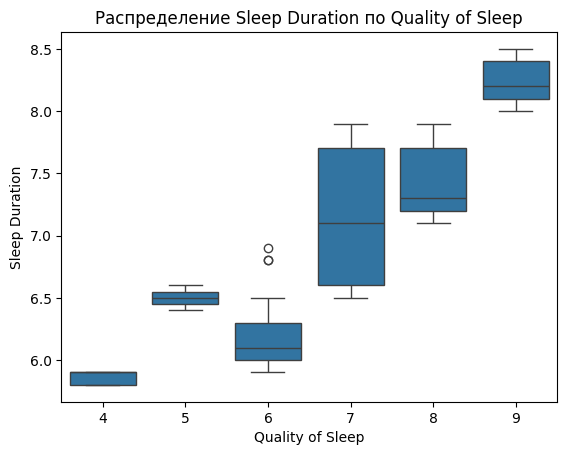

In [10]:
sns.boxplot(data=df, x="Quality of Sleep", y="Sleep Duration")
plt.title("Распределение Sleep Duration по Quality of Sleep")
plt.show()

При очень низком качестве сна (4) медианная длительность сна в районе 5.5 часов, а при низком (5) в районе 6.5 часов. При среднем качестве сна (6) длительность равна 6 часам. При качестве выше среднего (7-8) длительность уже выше: 7-7.5 часов. При высоком качестве сна (9) длительность ещё выше: 8 часов.

Видно, что распределение длительности сна сдвигается вверх при увеличении качества сна.

Выведем распределение уровня стресса и разбор по уровню стресса и длительности сна.

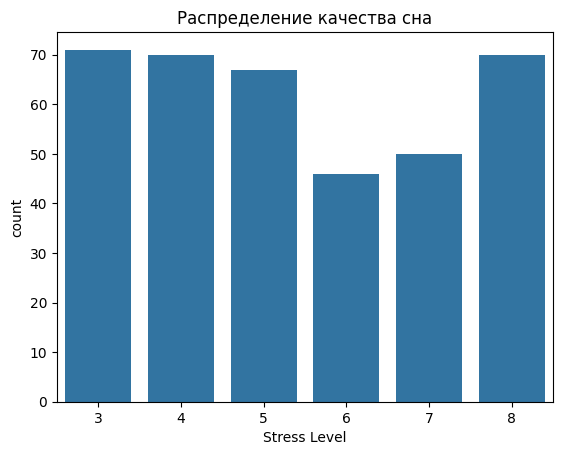

              count      mean       std  min    25%  50%  75%  max
Stress Level                                                      
3              71.0  8.226761  0.219061  7.5  8.100  8.2  8.4  8.5
4              70.0  7.030000  0.397948  6.5  6.600  7.1  7.2  8.1
5              67.0  7.483582  0.300301  6.7  7.200  7.5  7.8  7.9
6              46.0  7.454348  0.503193  6.1  7.200  7.7  7.8  7.9
7              50.0  6.468000  0.146301  6.3  6.325  6.5  6.5  6.9
8              70.0  6.050000  0.091287  5.8  6.000  6.0  6.1  6.2


In [11]:
sns.countplot(data=df, x="Stress Level")
plt.title("Распределение качества сна")
plt.show()

print(df.groupby("Stress Level")['Sleep Duration'].describe())

Датасет сбалансирован по уровню стресса, так как количество человек с разными уровнями стресса примерно одинаково.

С увеличением уровня стресса снижается среднее значение длительности сна, то есть чем выше стресс, тем ниже длительность сна.

Выведем корреляционную матрицу

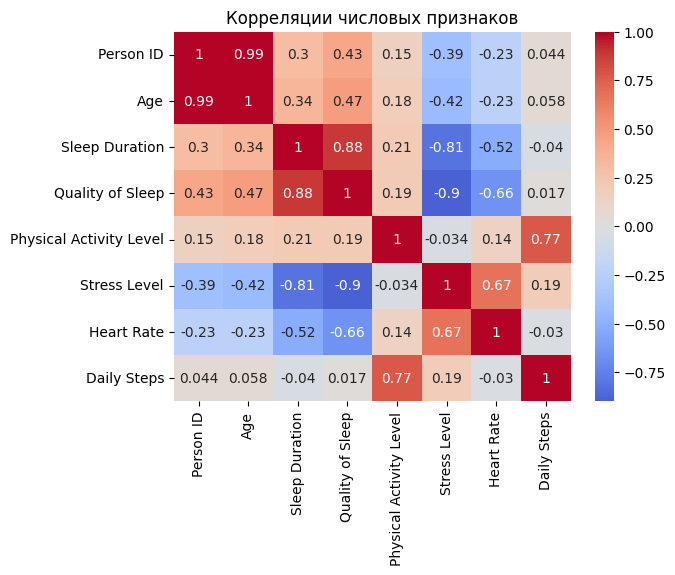

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Корреляции числовых признаков")
plt.show()

На Sleep Duration сильнее всего влияют Stress Level (-0.81) и Quality of Sleep (0.88). Средняя связь: Heart Rate (-0.52). Остальные признаки корреллируют мало.

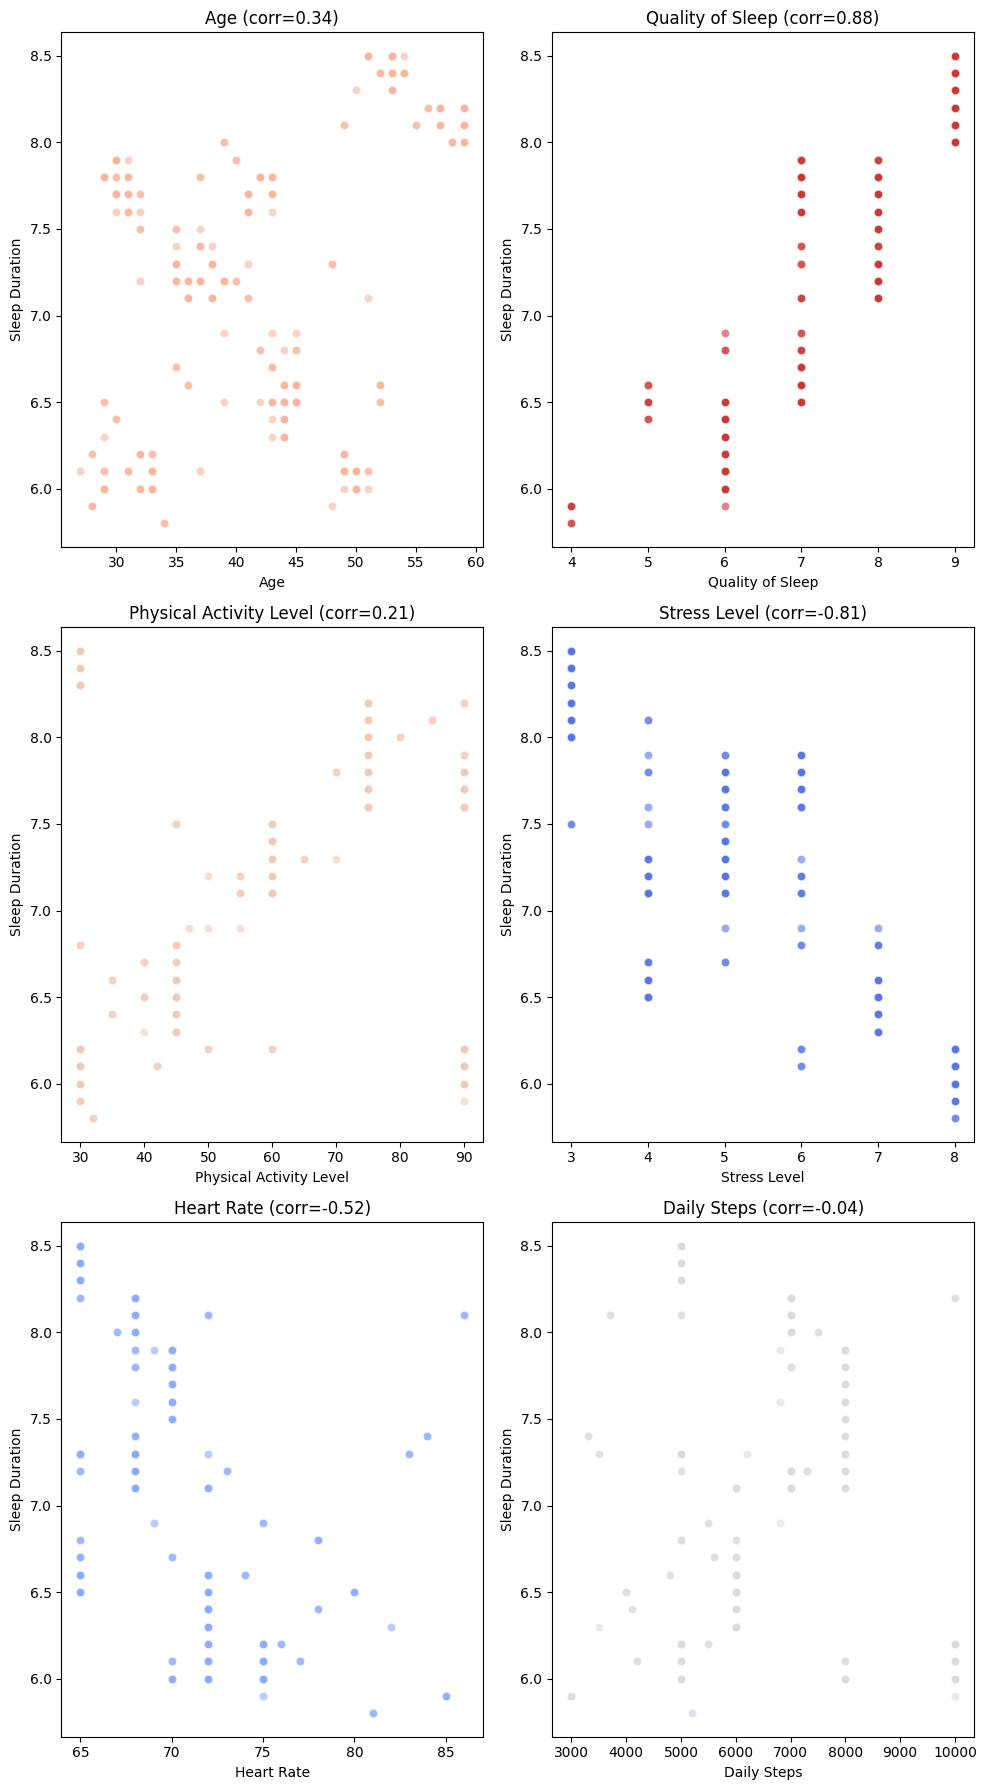

In [21]:
num_features = X_eda.select_dtypes(include="number").columns
n = len(num_features)

corrs = df[num_features].corrwith(y_eda)

cmap = plt.colormaps["coolwarm"]

fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(10, n*3))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)

    sns.scatterplot(ax=axes[i], data=df, x=col, y='Sleep Duration', color=color, alpha=0.6)
    axes[i].set_title(f"{col} (corr={corr:.2f})")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Отберём лучшие признаки

In [16]:
from sklearn.preprocessing import StandardScaler

best_features = ['Stress Level', 'Quality of Sleep', 'Heart Rate']

X = df[best_features]
y = df[['Sleep Duration']]

X_scaled = StandardScaler().fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).head(n=3)

,Stress Level,Quality of Sleep,Heart Rate
0,0.347021,-1.09828,1.654719
1,1.475592,-1.09828,1.170474
2,1.475592,-1.09828,1.170474


Разделим выборку на тестовую и обучающую

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Создадим модель линейной регрессии и обучим её

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Выведем метрики качества

In [19]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

метрики для выборки на которых обучалась модель
MAE 0.298
MAPE=0.042, MAPE_as_percent=4.182%
R2=0.790
MSE=0.130
RMSE=0.361


In [20]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

метрики для выборки на которых модель никогда не обучалась
MAE 0.298
MAPE=0.042, MAPE_as_percent=4.220%
R2=0.794
MSE=0.137
RMSE=0.370
